In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
train_path = "/content/drive/MyDrive/Birds data for deep learning"
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "categorical",
                                              subset="training")
validation_generator = datagen.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "categorical",
                                              subset="validation")

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(units=train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
              metrics=['accuracy'])
h= model.fit(train_generator,epochs=5,validation_data=validation_generator)
loss, acc = model.evaluate(train_generator)
print(f"Training Accuracy: {acc:.4f}")
print(f"Training Loss: {loss:.4f}")


Found 2653 images belonging to 3 classes.
Found 662 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 907s 11s/step - accuracy: 0.9178 - loss: 0.3354 - val_accuracy: 0.9683 - val_loss: 0.1548
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9679 - loss: 0.1868 - val_accuracy: 0.9683 - val_loss: 0.1695
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9673 - loss: 0.1723 - val_accuracy: 0.9683 - val_loss: 0.1529
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9687 - loss: 0.1565 - val_accuracy: 0.9683 - val_loss: 0.1524
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9689 - loss: 0.1461 - val_accuracy: 0.9683 - val_loss: 0.1526
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 561ms/step - accuracy: 0.9702 - loss: 0.1446
Training Accuracy: 0.9676
Training Loss: 0.1500


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted Class: ABBOTTS BOOBY


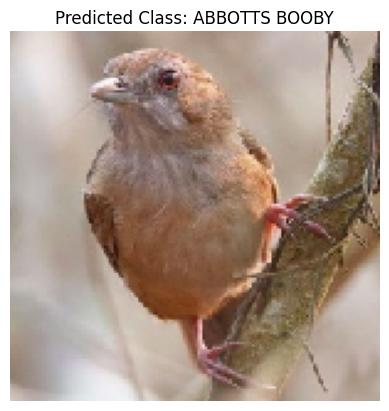

In [ ]:
classes = ["ABBOTTS BABBLER","ABBOTTS BOOBY","ABYSSINIAN GROUND HORNBILL","AFRICAN CROWNED CRANE","AFRICAN EMERALD CUCKOO","AFRICAN FIREFINCH","AFRICAN OYSTER CATCHER","AFRICAN PIED HORNBILL","AFRICAN PYGMY GOOSE","ALBATROSS","ALBERTS TOWHEE","ALEXANDRINE PARAKEET","ALPINE CHOUGH","ALTAMIRA YELLOWTHROAT","AMERICAN AVOCET","AMERICAN BITTERN","AMERICAN COOT","AMERICAN FLAMINGO","AMERICAN GOLDFINCH","AMERICAN KESTREL"]


img_path = "/content/drive/MyDrive/prediction imgs/ABBOTTS BABBLER.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
prediction_label = classes[predicted_class_index]
print(f"Predicted Class: {prediction_label}")


plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {prediction_label}")
plt.show()

In [ ]:
model.save("saved_model/")

In [ ]:
train_class_detection = "/content/drive/MyDrive/Birds data for deep learning/train"
datagen1 = datagen.flow_from_directory(train_class_detection)
datagen1.class_indices

Found 3208 images belonging to 20 classes.


{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}